# 5000训练数据导入和处理

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML
import csv 
import numpy as np 
sns.set_style('darkgrid')
#加载词云包
from wordcloud import WordCloud,STOPWORDS   

In [75]:
movies = pd.read_csv('F:/大三（上）/机器学习/机器学习期末报告/机器学习期末报告/电影数据分析/data/tmdb_5000_movies.csv',engine='python')    
credits = pd.read_csv('F:/大三（上）/机器学习/机器学习期末报告/机器学习期末报告/电影数据分析/data/tmdb_5000_credits.csv',engine='python')  

In [76]:
#json数据解析
json_cols = ['genres','keywords', 'spoken_languages', 'production_companies', 'production_countries']
for i in json_cols:
    movies[i] = movies[i].apply(json.loads)
def get_names(x):
    return ','.join([i['name'] for i in x])
movies['genres'] = movies['genres'].apply(get_names)
movies['keywords'] = movies['keywords'].apply(get_names)          
movies['spoken_languages'] = movies['spoken_languages'].apply(get_names)
movies['production_countries'] = movies['production_countries'].apply(get_names) 
movies['production_companies'] = movies['production_companies'].apply(get_names)

In [77]:
pd.set_option('display.max_columns', None) # 显示所有列
display(movies.sample(3))
display(credits.sample(3)) 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2427,0,Family,NaN,16112,,en,The Adventures of Elmo in Grouchland,"Elmo loves his fuzzy, blue blanket, and would ...",3.091590,"Columbia Pictures,Children's Television Worksh...",United States of America,1999-10-01,0,73.0,English,Released,"The Good, The Bad and The Stinky.",The Adventures of Elmo in Grouchland,6.3,14
523,75000000,"Action,Adventure,Thriller",https://www.epicbuzz.net/movies/vertical-limit,11678,"himalaya,pakistan,climbing,k2,mountaineering,k...",en,Vertical Limit,"Trapped near the summit of K2, the world's sec...",13.318744,"Columbia Pictures Corporation,Global Entertain...","New Zealand,Pakistan,United States of America",2000-12-08,215663859,124.0,"English,اردو",Released,The Mountain Will Decide.,Vertical Limit,5.9,283
4402,0,"Drama,Action,Thriller",NaN,56491,"rebel,usa president,hostage,airplane",en,In Her Line of Fire,When the Vice President's plane goes down near...,0.429587,,United States of America,2006-04-21,0,88.0,English,Released,Behind Enemy Lines No Man Can Stop Her. Only O...,In Her Line of Fire,3.3,9


,movie_id,title,cast,crew
1164,4234,Scream 3,"[{""cast_id"": 15, ""character"": ""Dewey Riley"", ""...","[{""credit_id"": ""52fe43b4c3a36847f80690dd"", ""de..."
3368,14578,Outside Providence,"[{""cast_id"": 1, ""character"": ""Tim Dunphy"", ""cr...","[{""credit_id"": ""52fe46039251416c7506a1b1"", ""de..."
583,587,Big Fish,"[{""cast_id"": 5, ""character"": ""Younger Ed Bloom...","[{""credit_id"": ""52fe4258c3a36847f8017005"", ""de..."


In [78]:
movies.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [79]:
movies.describe() 

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [80]:
credits.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


## movies 数据缺失值处理

In [81]:
# 查看缺失值
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [82]:
# 删除列 
deleted_columns = ['homepage', 'tagline', 'overview','status']
# 把它从电影里删掉
movies.drop(deleted_columns,axis = 1 ,inplace = True) 

In [83]:
movies.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   popularity            4803 non-null   float64
 7   production_companies  4803 non-null   object 
 8   production_countries  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  title                 4803 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

In [84]:
# 填补缺失值
nanX=movies['runtime'].isnull()
movies.loc[nanX,:]  

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
2656,15000000,Drama,370980,"pope,biography",it,Chiamatemi Francesco - Il Papa della gente,0.738646,Taodue Film,Italy,2015-12-03,0,NaN,Español,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,Documentary,459488,"music,actors,legendary perfomer,classic hollyw...",en,"To Be Frank, Sinatra at 100",0.050625,Eyeline Entertainment,United Kingdom,2015-12-12,0,NaN,,"To Be Frank, Sinatra at 100",0.0,0


In [85]:
movies.loc[2656,'runtime']='98'
movies.loc[4140,'runtime']='82'
movies.loc[nanX,:]  

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
2656,15000000,Drama,370980,"pope,biography",it,Chiamatemi Francesco - Il Papa della gente,0.738646,Taodue Film,Italy,2015-12-03,0,98,Español,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,Documentary,459488,"music,actors,legendary perfomer,classic hollyw...",en,"To Be Frank, Sinatra at 100",0.050625,Eyeline Entertainment,United Kingdom,2015-12-12,0,82,,"To Be Frank, Sinatra at 100",0.0,0


In [86]:
nanX1=movies['release_date'].isnull()
movies.loc[nanX1,:]   

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4553,0,,380097,,en,America Is Still the Place,0.0,,,NaN,0,0,,America Is Still the Place,0.0,0


In [87]:
movies.loc[4553,'release_date']='2014/6/1'
movies.loc[nanX1,:]   

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4553,0,,380097,,en,America Is Still the Place,0.0,,,2014/6/1,0,0,,America Is Still the Place,0.0,0


## credits 数据处理及合并数据集

In [88]:
credits.isnull().sum() 

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [89]:
#deleted columns 
deleted_columns1 = ['title', 'movie_id']
#drop it from our movies
credits.drop(deleted_columns1,axis = 1 ,inplace = True) 

In [90]:
# 合并2个数据集
fullDF=pd.concat([movies,credits],axis=1) 

In [91]:
# 将release_date的数据类型转化成日期类型
fullDF.loc[:,'release_date']=pd.to_datetime(fullDF.loc[:,'release_date'],format='%Y-%m-%d',errors='coerce')
fullDF.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   id                    4803 non-null   int64         
 3   keywords              4803 non-null   object        
 4   original_language     4803 non-null   object        
 5   original_title        4803 non-null   object        
 6   popularity            4803 non-null   float64       
 7   production_companies  4803 non-null   object        
 8   production_countries  4803 non-null   object        
 9   release_date          4803 non-null   datetime64[ns]
 10  revenue               4803 non-null   int64         
 11  runtime               4803 non-null   object        
 12  spoken_languages      4803 non-null   object        
 13  title             

## 异常值处理

In [92]:
# 对预算、票房、受欢迎程度、评分、评分次数中为0的数值用平均值替代
fullDF['budget'].replace(0, fullDF['budget'].mean(), inplace=True)
fullDF['revenue'].replace(0, fullDF['revenue'].mean(), inplace=True)
fullDF['popularity'].replace(0, fullDF['popularity'].mean(), inplace=True)
fullDF['vote_average'].replace(0, fullDF['vote_average'].mean(), inplace=True)
fullDF['vote_count'].replace(0, fullDF['vote_count'].mean(), inplace=True)
fullDF.describe() 

,budget,id,popularity,revenue,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,3.531606e+07,57165.484281,21.496775,1.067008e+08,6.172081,699.127736
std,3.790514e+07,88694.614033,31.815138,1.546419e+08,0.966326,1232.060053
min,1.000000e+00,5.000000,0.000372,5.000000e+00,0.500000,1.000000
25%,1.200000e+07,9014.500000,4.674558,2.760697e+07,5.600000,59.000000
50%,2.904504e+07,14629.000000,12.928269,8.226064e+07,6.200000,250.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,10.000000,13752.000000


## 具体时间提取

In [93]:
fullDF['release_year'] = pd.DatetimeIndex(fullDF['release_date']).year
fullDF['release_month'] = pd.DatetimeIndex(fullDF['release_date']).month
fullDF['release_day'] = pd.DatetimeIndex(fullDF['release_date']).day
fullDF['release_dow'] = pd.DatetimeIndex(fullDF['release_date']).dayofweek

In [94]:
fullDF.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   float64       
 1   genres                4803 non-null   object        
 2   id                    4803 non-null   int64         
 3   keywords              4803 non-null   object        
 4   original_language     4803 non-null   object        
 5   original_title        4803 non-null   object        
 6   popularity            4803 non-null   float64       
 7   production_companies  4803 non-null   object        
 8   production_countries  4803 non-null   object        
 9   release_date          4803 non-null   datetime64[ns]
 10  revenue               4803 non-null   float64       
 11  runtime               4803 non-null   object        
 12  spoken_languages      4803 non-null   object        
 13  title             

## 人员提取 

In [95]:
json_cols = ['cast', 'crew'] 
for i in json_cols:
    fullDF[i] = fullDF[i].apply(json.loads) 

In [96]:
# 提取演员
def get_names(x):
    return ','.join([i['name'] for i in x])
fullDF['cast'] =  fullDF['cast'].apply(get_names)

In [97]:
# 提取导演
def get_directors(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
fullDF['crew'] = fullDF['crew'].apply(get_directors) 

In [98]:
#将字段‘crew’改为‘director’ 
fullDF.rename(columns={'crew':'director'}, inplace = True) 

In [74]:
fullDF.head(n=2) 

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,director,release_year,release_month,release_day,release_dow
0,237000000.0,Action,19995,Action,en,Avatar,150.437577,Action,Action,2009-12-10,2.787965e+09,162,Action,Avatar,7.2,11800.0,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,2009,12,10,3
1,300000000.0,Adventure,285,Adventure,en,Pirates of the Caribbean: At World's End,139.082615,Adventure,Adventure,2007-05-19,9.610000e+08,169,Adventure,Pirates of the Caribbean: At World's End,6.9,4500.0,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,2007,5,19,5


## 单标签选择

In [99]:
train1 = fullDF['genres'].str.split(',',0,expand=True)
train2 = fullDF['keywords'].str.split(',',0,expand=True)
train3 = fullDF['production_companies'].str.split(',',0,expand=True)
train4 = fullDF['production_countries'].str.split(',',0,expand=True)
train5 = fullDF['spoken_languages'].str.split(',',0,expand=True)
fullDF['genres']=train1[0]
fullDF['keywords']=train2[0]
fullDF['production_companies']=train3[0]
fullDF['production_countries']=train4[0]
fullDF['spoken_languages']=train5[0]
fullDF.head() 

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,director,release_year,release_month,release_day,release_dow
0,237000000.0,Action,19995,culture clash,en,Avatar,150.437577,Ingenious Film Partners,United States of America,2009-12-10,2.787965e+09,162,English,Avatar,7.2,11800.0,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,2009,12,10,3
1,300000000.0,Adventure,285,ocean,en,Pirates of the Caribbean: At World's End,139.082615,Walt Disney Pictures,United States of America,2007-05-19,9.610000e+08,169,English,Pirates of the Caribbean: At World's End,6.9,4500.0,"Johnny Depp,Orlando Bloom,Keira Knightley,Stel...",Gore Verbinski,2007,5,19,5
2,245000000.0,Action,206647,spy,en,Spectre,107.376788,Columbia Pictures,United Kingdom,2015-10-26,8.806746e+08,148,Français,Spectre,6.3,4466.0,"Daniel Craig,Christoph Waltz,Léa Seydoux,Ralph...",Sam Mendes,2015,10,26,0
3,250000000.0,Action,49026,dc comics,en,The Dark Knight Rises,112.312950,Legendary Pictures,United States of America,2012-07-16,1.084939e+09,165,English,The Dark Knight Rises,7.6,9106.0,"Christian Bale,Michael Caine,Gary Oldman,Anne ...",Christopher Nolan,2012,7,16,0
4,260000000.0,Action,49529,based on novel,en,John Carter,43.926995,Walt Disney Pictures,United States of America,2012-03-07,2.841391e+08,132,English,John Carter,6.1,2124.0,"Taylor Kitsch,Lynn Collins,Samantha Morton,Wil...",Andrew Stanton,2012,3,7,2


# 描述性分析

## 观众喜欢什么电影类型?有什么主题关键词?

In [100]:
pop_gen = pd.DataFrame(fullDF['genres'].value_counts()).reset_index()
pop_gen.columns = ['genres', 'movies']
pop_gen.head(10)  

,genres,movies
0,Drama,1207
1,Comedy,1042
2,Action,754
3,Adventure,339
4,Horror,300
5,Crime,195
6,Thriller,194
7,Animation,123
8,Fantasy,117
9,Romance,106


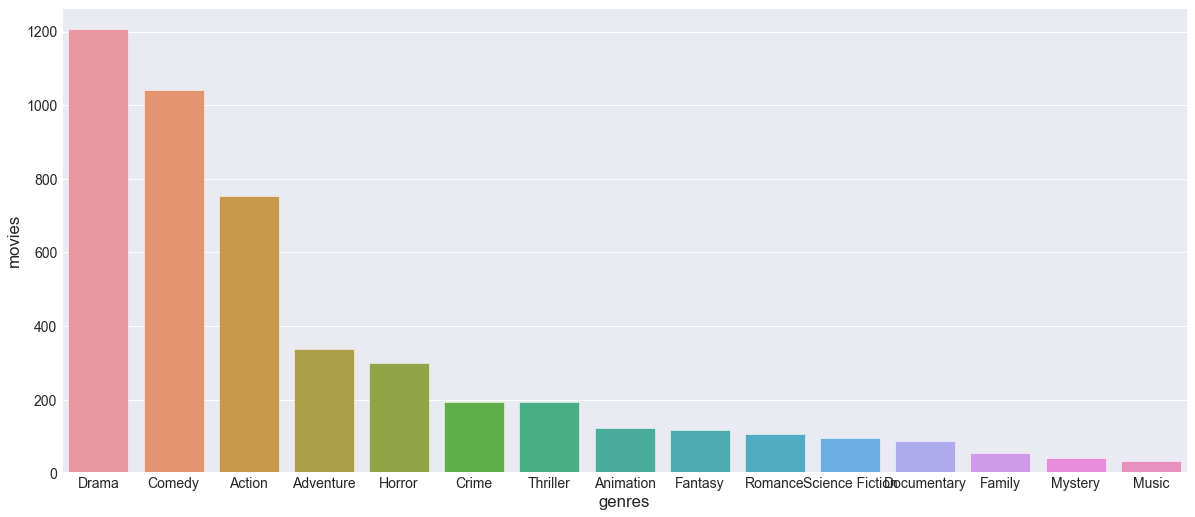

In [101]:
plt.figure(figsize=(18,8))
sns.barplot(x='genres', y='movies', data=pop_gen.head(15))
plt.show()  

In [102]:
key1 = pd.DataFrame(fullDF['keywords'].value_counts()).reset_index()
key1.columns = ['keywords', 'movies']
key1.head(10)  

,keywords,movies
0,,412
1,based on novel,94
2,independent film,87
3,new york,73
4,london england,61
5,prison,60
6,suicide,48
7,paris,44
8,woman director,43
9,sex,42


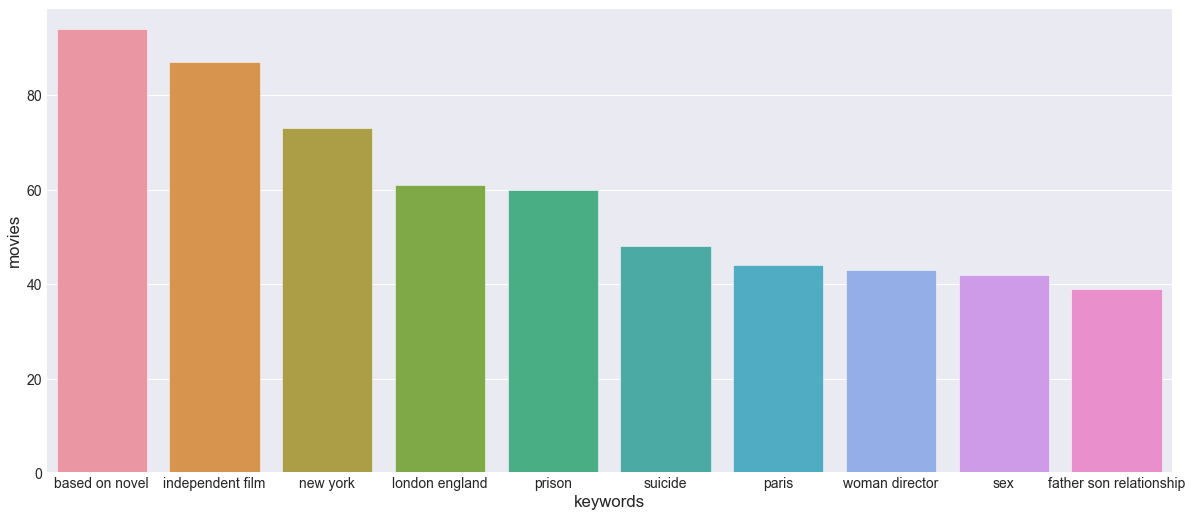

In [103]:
plt.figure(figsize=(18,8))
sns.barplot(x='keywords', y='movies', data=key1.drop([0]).head(10))
plt.show()  

In [121]:
from collections import Counter
from operator import itemgetter
from wordcloud import WordCloud 

In [124]:
keyword_list=[]
list1=[]
for x in fullDF['keywords']:
    keyword_list.append(x)
    keyword_list
keyword_list=''.join(keyword_list)
keyword_list.replace('\'s','') 

"culture clashoceanspydc comicsbased on noveldual identityhostagemarvel comicwitchdc comicssaving the worldkillingwitchtexassaving the worldbased on novelnew yorkseatime travelcorruptionloss of fatherrobin hoodelvesenglandfilm businessshipwreckcivil warfightmonsterspydual identityterroristbased on novelmutantmonsteregyptsequelcircusobsessionartificial intelligencecar racedc comicshostagesaving the worldcar racedystopia1970sspacecraftbased on fairy talebased on novelpersiadystopiamoonsaving the worldtyrannosaurus rexscotlandsequelromantic comedyambassadorcivilizationholidayjupiterafricasaving the worldmutantdc comicsage differencealienmiddle eastlibrarysteampunkdc comicsfather son relationshipdeja vuoceanterroristdreambased on novelmalibuqueenfairy taleleaderjapanwashington d.c.ogreinventorbrother brother relationshipsupport groupsanta clausalternate historyflyingsaving the worldmarvel comicsaving the worldloss of lovermonsterriddlestreet gangdiaryciarevolutionwitchnew year evebased on 

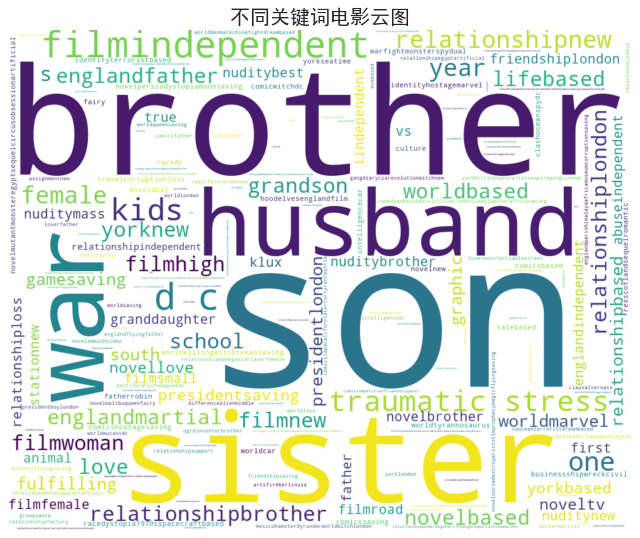

In [129]:
wc1 = WordCloud(background_color='white', width=1000, 
               height=800, margin=2).generate(keyword_list)
plt.figure(figsize=(10,15))
plt.imshow(wc1,interpolation="bilinear")
plt.axis('off')
plt.title('不同关键词电影云图', fontsize=20)
plt.show() 

In [140]:
# 将电影发行日期作为索引
fullDF.index = fullDF['release_date']
# 按时间排序
fullDF.sort_index(ascending=True, inplace=True)
fullDF.head(3)

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,director,release_year,release_month,release_day,release_dow
release_date,,,,,,,,,,,,,,,,,,,,,,
1916-09-04,385907.0,Drama,3059,usa,en,Intolerance,3.232447,Triangle Film Corporation,United States of America,1916-09-04,8394751.0,197,English,Intolerance,7.4,60.0,"Lillian Gish,Mae Marsh,Robert Harron,F.A. Turn...",D.W. Griffith,1916,9,4,0
1925-11-05,245000.0,Drama,3060,world war i,en,The Big Parade,0.785744,Metro-Goldwyn-Mayer (MGM),United States of America,1925-11-05,22000000.0,151,,The Big Parade,7.0,21.0,"John Gilbert,Renée Adorée,Hobart Bosworth,Clai...",King Vidor,1925,11,5,3
1927-01-10,92620000.0,Drama,19,man vs machine,de,Metropolis,32.351527,Paramount Pictures,Germany,1927-01-10,650422.0,153,No Language,Metropolis,8.0,657.0,"Brigitte Helm,Alfred Abel,Gustav Fröhlich,Rudo...",Fritz Lang,1927,1,10,0


In [142]:
genre_set = set()   #设置空集合
for x in fullDF['genres']:
    genre_set.update(x.split('|'))  #genres数据以'|'来分隔
genre_set.discard('') 

In [143]:
genre_df = pd.DataFrame()  # 创建空的数据框
for genre in genre_set:
    #如果一个值中包含特定内容，则编码为1，否则编码为0
    genre_df[genre] = fullDF['genres'].str.contains(genre).map(lambda x:1 if x else 0)

In [146]:
genre_by_year = genre_df.groupby(fullDF['release_year']).sum()  
genresum_by_year = genre_by_year.sum().sort_values(ascending=False)

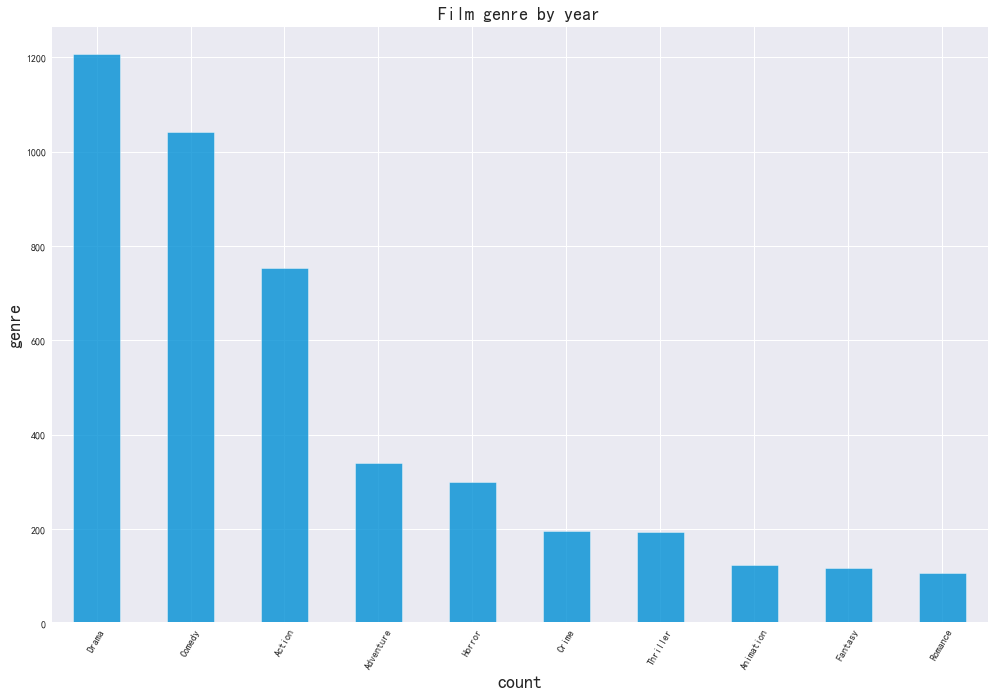

In [179]:
# 计算每个风格genre的电影总数目，并降序排列，再可视化
fig = plt.figure(figsize=(15,11))   #设置画图框的大小
ax = plt.subplot(1,1,1)     #设置框的位置
ax = genresum_by_year[:10].plot.bar(alpha=0.8) 
plt.xticks(rotation=60)
plt.title('Film genre by year', fontsize=18)    #设置标题的字体大小，标题名
plt.xlabel('count', fontsize=18)    #X轴名及轴名大小
plt.ylabel('genre', fontsize=18)    #y轴名及轴名大小
plt.show()  #可以用查看数据画的图。

In [171]:
# 将不同类型电影按数量排序，除前十名外，其余统称为others
gdict = dict(genre_by_year .sum())
gdict = sorted(gdict.items(), key=lambda item:item[1], reverse=True)
gdict = dict(gdict[:10])

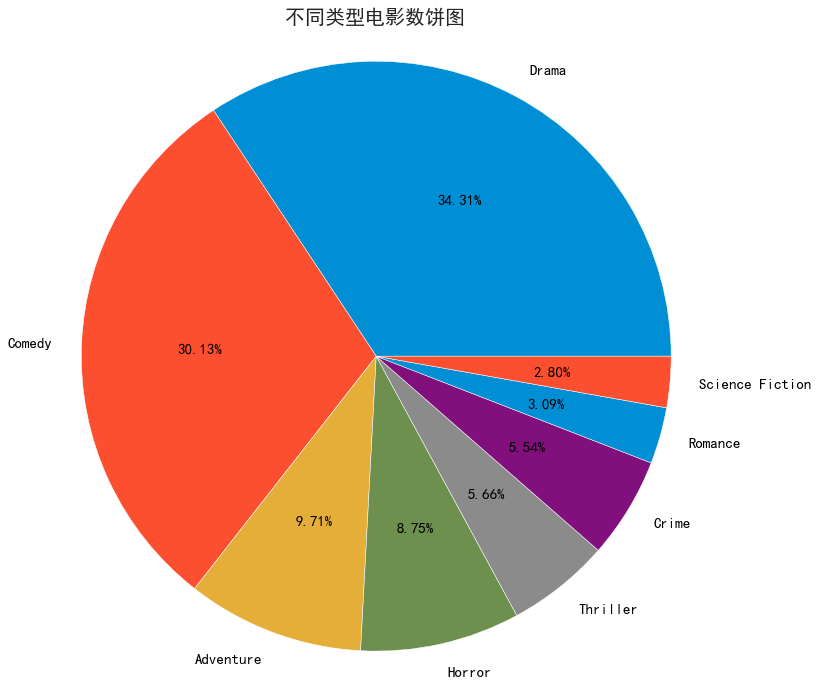

In [187]:
# 绘制不同类型电影数量图
# 定义饼图的大小
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']

plt.figure(figsize=(10, 12))
size = gdict.values()
labels = gdict.keys()
plt.pie(size, labels=labels, autopct = '%3.2f%%',startangle=0, textprops={'fontsize':15,'color':'black'})
plt.axis('equal')
plt.title('不同类型电影数饼图', fontsize=20)
plt.show() 

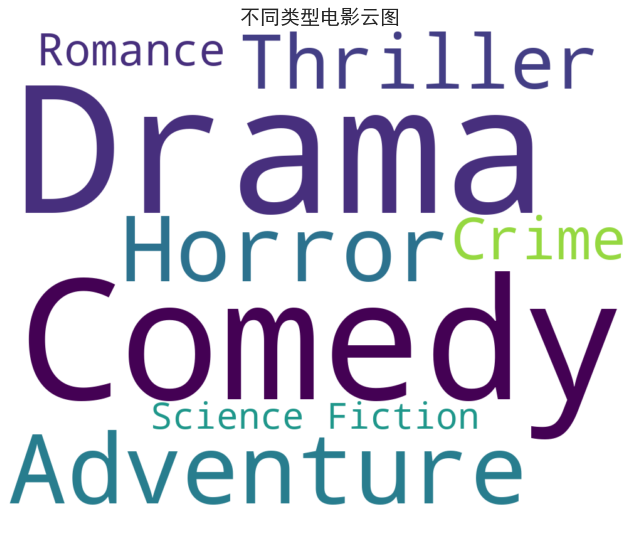

In [176]:
# 用云图展示
wc = WordCloud(background_color='white', width=1000, height=800, margin=2).generate_from_frequencies(dict(genre_by_year.sum()))
plt.figure(figsize=(10,15))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title('不同类型电影云图', fontsize=20)
plt.show()

## 电影风格随时间是如何变化的?

In [150]:
# 筛选出电影风格TOP8
genre_by_year = genre_by_year[['Drama','Comedy','Thriller','Romance',
                               'Adventure','Crime', 'Science Fiction',
                               'Horror']].loc[1960:,:]
year_min = fullDF['release_year'].min()   #最小年份
year_max = fullDF['release_year'].max()   #最大年份

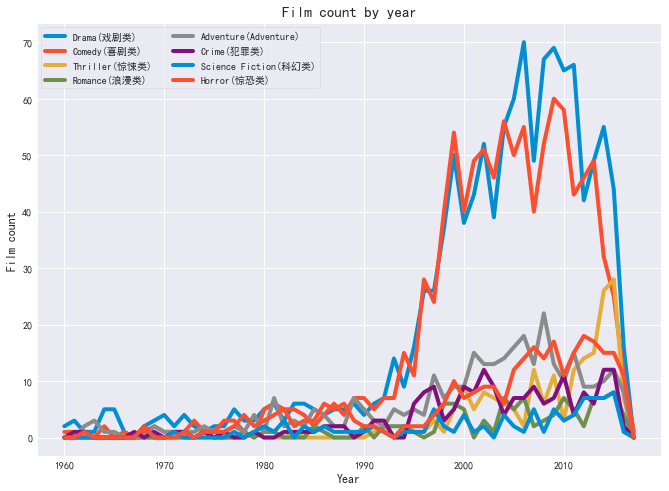

In [151]:
# 可视化电影风格genre随时间的变化趋势(1960年至今)
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(1,1,1)
plt.plot(genre_by_year)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Film count', fontsize=12)
plt.title('Film count by year', fontsize=15)
plt.xticks(range(1960, 2017, 10))  #横坐标每隔10年一个刻度

plt.legend(['Drama(戏剧类)','Comedy(喜剧类)','Thriller(惊悚类)','Romance(浪漫类)',
                               'Adventure(Adventure)','Crime(犯罪类)', 'Science Fiction(科幻类)',
                               'Horror(惊恐类)'], loc='best',ncol=2) #设置说明标签
plt.show()   

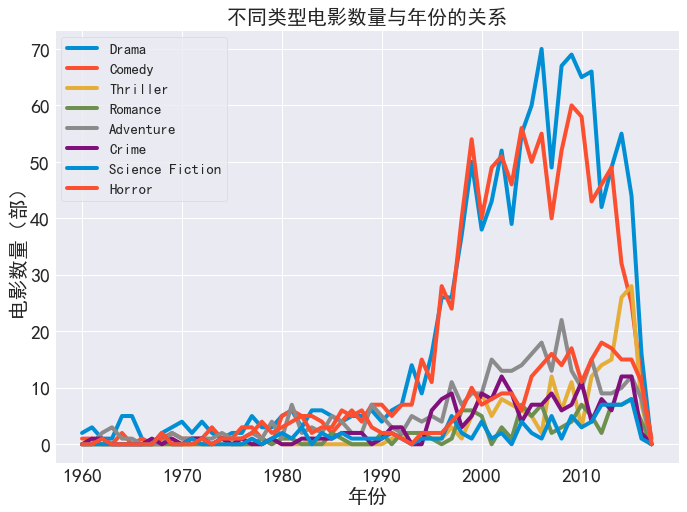

In [152]:
# 绘制电影类型随年代变化图
genre_by_year.plot(figsize=(10, 8), fontsize=20)
plt.xlabel('年份', fontsize=20)
plt.ylabel('电影数量（部）', fontsize=20)
plt.legend(loc=2, fontsize=15)
plt.title('不同类型电影数量与年份的关系', fontsize=20)
plt.show()

## 电影预算高低是否影响票房? 

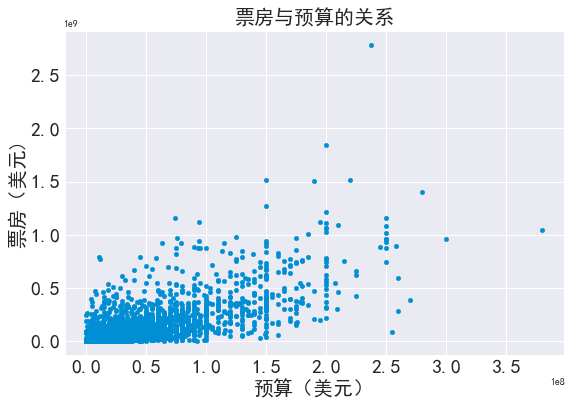

In [153]:
# 票房与预算的关系
fullDF.plot(kind='scatter', x='budget', y='revenue', figsize=(8, 6), fontsize=20)
plt.xlabel('预算（美元）', fontsize=20)
plt.ylabel('票房（美元)', fontsize=20)
plt.title('票房与预算的关系', fontsize=20)
plt.show()

## 高票房或者高评分的导演有哪些? 

In [154]:
fullDF['director'].head(10)  

release_date
1916-09-04     D.W. Griffith
1925-11-05        King Vidor
1927-01-10        Fritz Lang
1929-01-30        G.W. Pabst
1929-02-08    Harry Beaumont
1930-11-15       James Whale
1932-12-08     Frank Borzage
1933-02-02       Lloyd Bacon
1933-02-09    Lowell Sherman
1934-02-22       Frank Capra
Name: director, dtype: object

In [158]:
fullDF.index = fullDF['id']
dir = fullDF[['director','vote_average','revenue']]
dir   

,director,vote_average,revenue
id,,,
3059,D.W. Griffith,7.4,8.394751e+06
3060,King Vidor,7.0,2.200000e+07
19,Fritz Lang,8.0,6.504220e+05
905,G.W. Pabst,7.6,8.226064e+07
65203,Harry Beaumont,5.0,4.358000e+06
...,...,...,...
339408,Nate Parker,6.5,1.586157e+07
385736,Justin Tipping,7.5,8.226064e+07
374461,Bruce Beresford,7.0,8.226064e+07


In [159]:
# 高评分
dir1 =dir.sort_values(by='vote_average', ascending=False, na_position='first')
dir1[:10] 

,director,vote_average,revenue
id,,,
361505,None,10.0,8.226064e+07
89861,Gary Sinyor,10.0,8.226064e+07
40963,None,10.0,8.226064e+07
78373,Tim McCanlies,10.0,5.655920e+05
346081,Rohit Jugraj,9.5,8.226064e+07
69848,Lance Hool,9.3,8.226064e+07
88641,Floyd Mutrux,8.5,1.235090e+05
278,Frank Darabont,8.5,2.834147e+07
43867,John Cromwell,8.4,8.226064e+07


In [160]:
# 高票房
dir2 =dir.sort_values(by='revenue', ascending=False, na_position='first')
dir2[:10]

,director,vote_average,revenue
id,,,
19995,James Cameron,7.2,2.787965e+09
597,James Cameron,7.5,1.845034e+09
24428,Joss Whedon,7.4,1.519558e+09
135397,Colin Trevorrow,6.5,1.513529e+09
168259,James Wan,7.3,1.506249e+09
99861,Joss Whedon,7.3,1.405404e+09
109445,Chris Buck,7.3,1.274219e+09
68721,Shane Black,6.8,1.215440e+09
211672,Kyle Balda,6.4,1.156731e+09


## 电影的发行时间最好选在啥时候?

Text(0.5, 1.0, 'Analysis of profit margin in relation to movie release month')

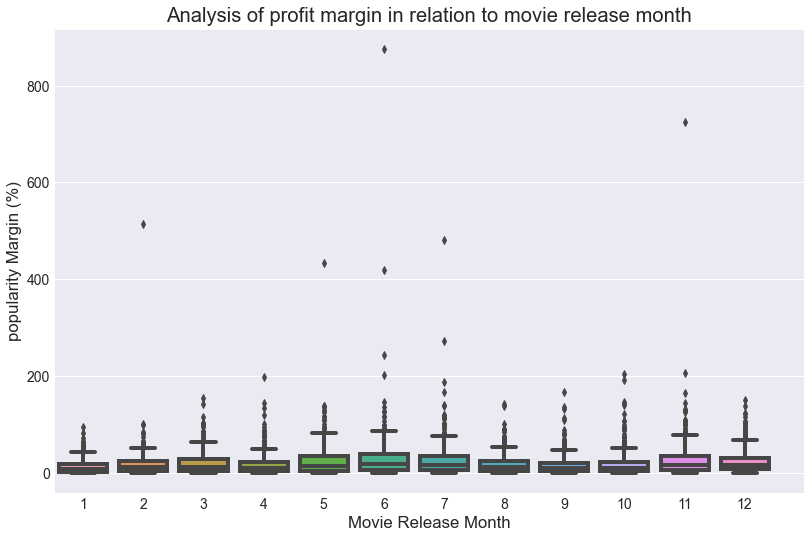

In [166]:
# distributions of popularity margin by release month
fig, ax = plt.subplots(figsize=(12,8))
# cm_filtered.boxplot(column=['profit'], by=['release_month'], ax=ax)
sns.boxplot(x='release_month', y='popularity', data=fullDF, ax=ax)
ax.set_xlabel('Movie Release Month')
ax.set_xticks(range(13))
ax.set_ylabel('popularity Margin (%)')
ax.set_title('Analysis of profit margin in relation to movie release month') 

AttributeError: 'DataFrame' object has no attribute 'show'

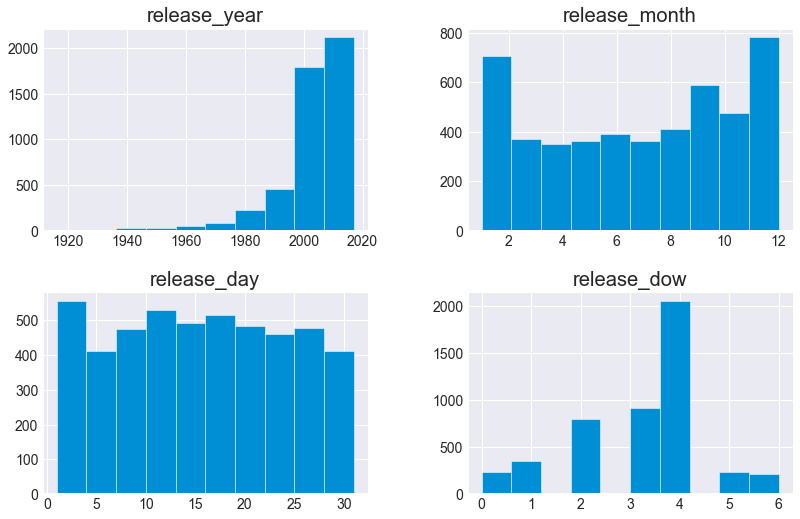

In [165]:
fullDF[['release_year','release_month','release_day','release_dow']].hist(figsize=(12, 8))
fullDF.show() 

## 拍原创电影好还是改编电影好?

In [188]:
#原创电影与改编电影对比分析
original_novel = pd.DataFrame()
original_novel['keywords'] = fullDF['keywords'].str.contains('based on').map(lambda x: 1 if x else 0)
original_novel['popularity'] = fullDF['popularity']
novel_count = original_novel['keywords'].sum()
original_count = original_novel['keywords'].count() - original_novel['keywords'].sum()
original_novel = original_novel.groupby('keywords', as_index = False).mean()
#创建原创与改编对比的数据框
org_vs_novel = pd.DataFrame()
org_vs_novel['count'] = [original_count, novel_count]
org_vs_novel['popularity'] = original_novel['popularity']
org_vs_novel.index = ['original works', 'based_on_novel'] 

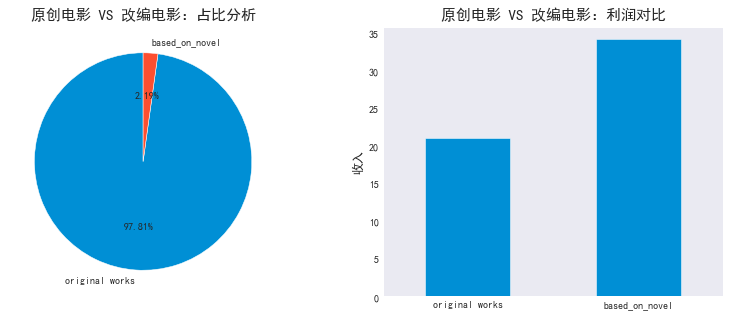

In [189]:
#可视化原创电影与改编电影的数量占比（饼图）、片均受益（柱状图）
fig= plt.figure(figsize = (12,5))
ax1 = plt.subplot(1, 2, 1)
ax1 = plt.pie(org_vs_novel['count'], labels=org_vs_novel.index, autopct='%.2f%%', startangle=90, pctdistance=0.6)
plt.title('原创电影 VS 改编电影：占比分析', fontsize=15)
ax2 = plt.subplot(1, 2, 2)
ax2 = org_vs_novel['popularity'].plot.bar()
plt.xticks(rotation=0)
plt.ylabel('收入', fontsize=12)
plt.title('原创电影 VS 改编电影：利润对比', fontsize=15)
plt.grid(False)
plt.show()

# 因子分析&特征提取

In [192]:
fullDF.reset_index(drop=True).head(2) 

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,director,release_year,release_month,release_day,release_dow
0,385907.0,Drama,3059,usa,en,Intolerance,3.232447,Triangle Film Corporation,United States of America,1916-09-04,8394751.0,197,English,Intolerance,7.4,60.0,"Lillian Gish,Mae Marsh,Robert Harron,F.A. Turn...",D.W. Griffith,1916,9,4,0
1,245000.0,Drama,3060,world war i,en,The Big Parade,0.785744,Metro-Goldwyn-Mayer (MGM),United States of America,1925-11-05,22000000.0,151,,The Big Parade,7.0,21.0,"John Gilbert,Renée Adorée,Hobart Bosworth,Clai...",King Vidor,1925,11,5,3


In [197]:
fullDF=fullDF.reset_index(drop=True)

In [198]:
X = fullDF.drop(columns=['vote_average'], axis=1).copy()
y = fullDF['vote_average'].copy()
X.shape, y.shape

((4803, 21), (4803,))

In [204]:
X1 = X[['genres','keywords','production_companies',
        'production_countries','spoken_languages']] 

提取上述指标中权重大的前几个，做后续数据准备

In [206]:
X11=pd.get_dummies(X1, drop_first=True)
X11=X11[['genres_Drama','genres_Comedy','genres_Thriller',
         'keywords_independent film','keywords_woman director','keywords_duringcreditsstinger',
         'production_companies_Universal Pictures','production_companies_Paramount Pictures',
         'production_countries_United States of America','spoken_languages_English']]
X11.head() 

,genres_Drama,genres_Comedy,genres_Thriller,keywords_independent film,keywords_woman director,keywords_duringcreditsstinger,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_countries_United States of America,spoken_languages_English
0,1,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,1


In [207]:
X2 = X[['budget','popularity','revenue','runtime']] 

In [208]:
# 数值变量数据标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X22=scaler.fit_transform(X2)
X22=pd.DataFrame(X22,columns=['budget','popularity','revenue','runtime'])
X22.head()

,budget,popularity,revenue,runtime
0,-0.921611,-0.574136,-0.635767,3.986679
1,-0.925329,-0.651048,-0.547779,1.952008
2,1.511930,0.341218,-0.685852,2.040472
3,-0.165457,-0.618405,-0.158060,0.094266
4,-0.921793,-0.645292,-0.661874,-0.303822


In [209]:
t = X[['release_month','release_day','release_dow']] 

In [210]:
X_transformed=pd.concat([y,X11,X22,t],axis=1)
X_transformed.head()  

,vote_average,genres_Drama,genres_Comedy,genres_Thriller,keywords_independent film,keywords_woman director,keywords_duringcreditsstinger,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_countries_United States of America,spoken_languages_English,budget,popularity,revenue,runtime,release_month,release_day,release_dow
0,7.4,1,0,0,0,0,0,0,0,1,1,-0.921611,-0.574136,-0.635767,3.986679,9,4,0
1,7.0,1,0,0,0,0,0,0,0,1,0,-0.925329,-0.651048,-0.547779,1.952008,11,5,3
2,8.0,1,0,0,0,0,0,0,1,0,0,1.511930,0.341218,-0.685852,2.040472,1,10,0
3,7.6,1,0,0,0,0,0,0,0,0,0,-0.165457,-0.618405,-0.158060,0.094266,1,30,2
4,5.0,1,0,0,0,0,0,0,0,1,1,-0.921793,-0.645292,-0.661874,-0.303822,2,8,4


In [211]:
X_transformed.shape 

(4803, 18)

In [212]:
conn = X_transformed.corr()
conn 

,vote_average,genres_Drama,genres_Comedy,genres_Thriller,keywords_independent film,keywords_woman director,keywords_duringcreditsstinger,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_countries_United States of America,spoken_languages_English,budget,popularity,revenue,runtime,release_month,release_day,release_dow
vote_average,1.000000,0.200190,-0.114675,-0.068887,-0.024041,-0.045594,-0.034978,0.019959,0.016292,-0.045374,-0.074360,0.015722,0.283175,0.158390,0.350869,0.116930,0.020570,-0.079236
genres_Drama,0.200190,1.000000,-0.304948,-0.118862,0.036484,0.016276,-0.000173,-0.038900,-0.038072,-0.077818,-0.059599,-0.149505,-0.098390,-0.124105,0.221362,0.084338,-0.001893,0.015194
genres_Comedy,-0.114675,-0.304948,1.000000,-0.107989,0.102745,-0.001763,0.039703,0.023649,0.000081,0.135226,0.058777,-0.122400,-0.110070,-0.088327,-0.149105,-0.034700,-0.014371,0.048670
genres_Thriller,-0.068887,-0.118862,-0.107989,1.000000,-0.027866,0.047863,-0.011861,-0.021039,-0.010589,-0.022763,-0.002054,-0.018575,0.002469,-0.020815,-0.010691,-0.016797,-0.006880,0.016338
keywords_independent film,-0.024041,0.036484,0.102745,-0.027866,1.000000,-0.012909,-0.007852,-0.032493,-0.033858,0.012442,-0.010181,-0.062983,-0.075556,-0.044672,-0.076760,-0.047987,-0.054414,0.021781
keywords_woman director,-0.045594,0.016276,-0.001763,0.047863,-0.012909,1.000000,-0.005495,-0.022738,-0.014275,-0.003565,-0.023315,-0.031832,-0.055387,-0.022596,-0.064856,-0.023384,0.002661,0.022827
keywords_duringcreditsstinger,-0.034978,-0.000173,0.039703,-0.011861,-0.007852,-0.005495,1.000000,-0.013831,0.000984,0.012590,0.003431,-0.002224,-0.016955,-0.004933,-0.015168,-0.002884,-0.036285,-0.000740
production_companies_Universal Pictures,0.019959,-0.038900,0.023649,-0.021039,-0.032493,-0.022738,-0.013831,1.000000,-0.059635,0.025164,0.044167,0.051479,0.077515,0.057137,0.054337,-0.020398,0.005544,0.007156
production_companies_Paramount Pictures,0.016292,-0.038072,0.000081,-0.010589,-0.033858,-0.014275,0.000984,-0.059635,1.000000,0.073301,0.027670,0.086315,0.064908,0.067175,0.054340,0.004766,0.027640,-0.033998
production_countries_United States of America,-0.045374,-0.077818,0.135226,-0.022763,0.012442,-0.003565,0.012590,0.025164,0.073301,1.000000,0.262318,0.032176,0.046908,0.042140,-0.035934,0.003507,0.023429,0.043065


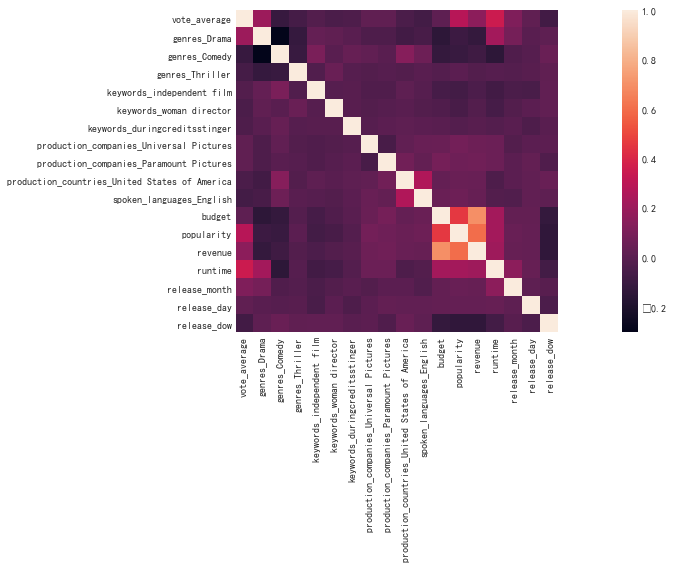

In [221]:
plt.figure(figsize=(18, 8))
sns.heatmap(conn, mask=np.zeros_like(conn, dtype=np.bool), square=True, annot=False, cbar=True)
plt.tight_layout()

In [222]:
conn['vote_average'].sort_values(ascending=False)

vote_average                                     1.000000
runtime                                          0.350869
popularity                                       0.283175
genres_Drama                                     0.200190
revenue                                          0.158390
release_month                                    0.116930
release_day                                      0.020570
production_companies_Universal Pictures          0.019959
production_companies_Paramount Pictures          0.016292
budget                                           0.015722
keywords_independent film                       -0.024041
keywords_duringcreditsstinger                   -0.034978
production_countries_United States of America   -0.045374
keywords_woman director                         -0.045594
genres_Thriller                                 -0.068887
spoken_languages_English                        -0.074360
release_dow                                     -0.079236
genres_Comedy 

## 拆分数据集

In [224]:
from sklearn.model_selection import train_test_split

data_tr,label_tr = X_transformed.iloc[:,1:],X_transformed.iloc[:,[0]] 
X_train, X_test, y_train, y_test = train_test_split(data_tr,label_tr, test_size=0.1,random_state=52)

In [225]:
X_train.shape

(4322, 17)

In [226]:
X_test.shape

(481, 17)

# 模型建立

## 线性回归

In [236]:
from sklearn import linear_model
linreg=linear_model.LinearRegression()   
linreg.fit(X_train,y_train)
print('系数矩阵是：\n',linreg.coef_)
print('截距项是：\n',linreg.intercept_)
print('R方为：\n',linreg.score(X_train,y_train))

系数矩阵是：
 [[ 2.66984065e-01 -5.73701639e-02 -3.02072649e-01  1.54929748e-01
  -9.11193653e-02 -4.23636837e-01 -1.34686145e-02  1.70207528e-02
  -1.87551698e-02 -1.72649014e-01 -2.28762358e-01  2.50188139e-01
   1.09988880e-01  2.80646497e-01  1.37914712e-02  2.39247254e-04
  -2.37201404e-02]]
截距项是：
 [6.26639201]
R方为：
 0.2384915700386836


In [240]:
# 计算预测结果
pred_y1 = linreg.predict(X_test)
pred_y1 
print(pred_y1 )

[[6.27493588]
 [5.86235157]
 [6.00142556]
 [6.18900322]
 [6.41940756]
 [6.08093372]
 [5.9577927 ]
 [6.89092934]
 [6.05615772]
 [5.7371857 ]
 [5.37795531]
 [5.83968692]
 [5.89471663]
 [6.09602671]
 [6.06908817]
 [7.3231591 ]
 [5.98198394]
 [5.83162247]
 [6.03284945]
 [7.12802273]
 [5.88923684]
 [6.80244947]
 [6.00323675]
 [5.95571249]
 [6.29071031]
 [6.48506905]
 [6.25520433]
 [6.49899815]
 [6.22096421]
 [5.96933953]
 [5.72314621]
 [6.23542808]
 [6.14657564]
 [6.09817603]
 [6.14420851]
 [6.34494211]
 [5.79324268]
 [5.90799271]
 [5.76255476]
 [6.44295991]
 [5.94751914]
 [5.73131922]
 [5.65583288]
 [7.10416612]
 [5.96166178]
 [6.20851215]
 [6.60640244]
 [6.14364672]
 [5.87924324]
 [5.79094402]
 [5.870078  ]
 [6.0087844 ]
 [5.96272098]
 [6.15852036]
 [5.4179457 ]
 [5.80758676]
 [6.1502684 ]
 [6.38710874]
 [6.76576881]
 [6.50003156]
 [6.52979767]
 [5.88344573]
 [5.65047243]
 [6.66916081]
 [6.48415043]
 [6.40343291]
 [6.07671835]
 [7.28327298]
 [6.25968303]
 [5.8752855 ]
 [6.29724305]
 [6.59

In [241]:
print('测试数据R方为：\n',linreg.score(X_test,y_test))

测试数据R方为：
 0.1698187683666994


In [238]:
# 计算均方误差(损失值)
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test.astype('int') ,pred_y1))

0.9802793147263495


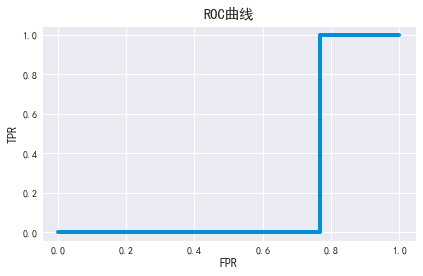

In [308]:
fpr1, tpr1, thersholds1 = metrics.roc_curve(y_test.astype('int'),pred_y1,pos_label=2)
plt.plot(fpr1, tpr1) #绘制ROC曲线图
plt.xlabel("FPR") 
plt.ylabel("TPR")
plt.title("ROC曲线")
plt.show()   

### 交叉验证下的线性回归建模的效果

In [254]:
from sklearn.model_selection import cross_val_score   #交叉验证
scores1=cross_val_score(linreg,data_tr,label_tr,cv=3) 
scores1.mean()

0.03985991421004579

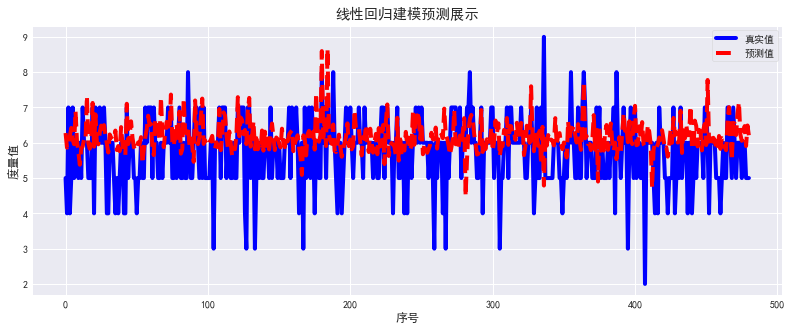

In [274]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test.astype('int'))),y_test.astype('int'),"b",label="真实值")
plt.plot(range(len(pred_y1)),pred_y1,"r--",label="预测值")
plt.title("线性回归建模预测展示")
plt.xlabel("序号")
plt.ylabel("度量值")
plt.legend() 
plt.show() 

## 树回归

In [246]:
import graphviz 
import pydotplus 
import pydot

In [244]:
from sklearn import tree
#构建模型
rgs=tree.DecisionTreeRegressor(max_depth=2)
rgs=rgs.fit(X_train,y_train)
print(rgs)

DecisionTreeRegressor(max_depth=2)


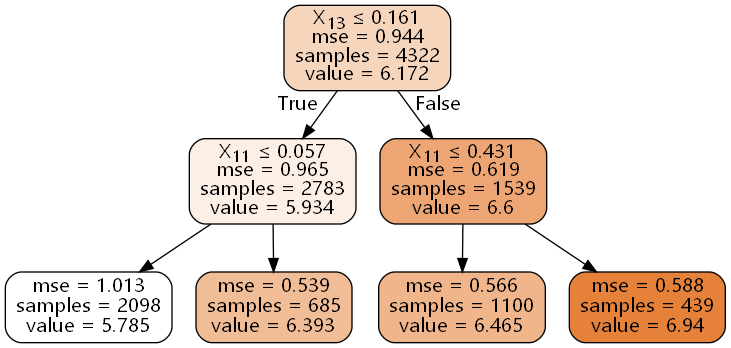

In [247]:
dot_tree= tree.export_graphviz(rgs,out_file=None, 
                                filled=True, rounded=True, 
                                special_characters=True)
graph_tree = pydotplus.graph_from_dot_data(dot_tree.replace('helvetica','"Microsoft Yahei"'))

from IPython.display import Image
Image(graph_tree.create_png())

In [250]:
rgs.score(X_test,y_test) #在测试集上的得分

0.15593251044000223

In [309]:
pred_y2 = rgs.predict(X_test.astype('int'))

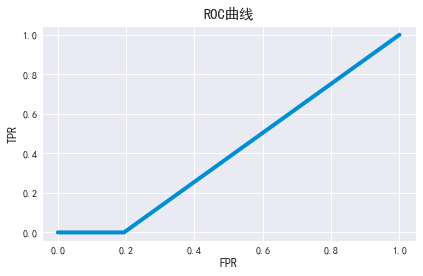

In [310]:
fpr2, tpr2, thersholds2 = metrics.roc_curve(y_test.astype('int'),pred_y2,pos_label=2)
plt.plot(fpr2, tpr2) #绘制ROC曲线图
plt.xlabel("FPR") 
plt.ylabel("TPR")
plt.title("ROC曲线")
plt.show()   

### 交叉验证下的决策树建模的效果

In [257]:
from sklearn.model_selection import cross_val_score   #交叉验证
scores2=cross_val_score(rgs,data_tr,label_tr,cv=3) 
scores2.mean()

0.11591617824134388

## SVM回归

In [260]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train.astype('int'), y_train.astype('int'))
svm_y = lsvc.predict(X_test)

In [262]:
from sklearn.metrics import classification_report
print ('Accuracy of the SVM: ' , lsvc.score(X_test.astype('int'), y_test.astype('int')))

Accuracy of the SVM:  0.27234927234927236


In [263]:
print (classification_report(y_test.astype('int'), svm_y)) 

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        31
           5       0.33      0.02      0.04       140
           6       0.46      0.59      0.52       207
           7       0.64      0.08      0.14        86
           8       0.00      0.00      0.00         7
           9       0.01      1.00      0.01         1

    accuracy                           0.28       481
   macro avg       0.18      0.21      0.09       481
weighted avg       0.41      0.28      0.26       481



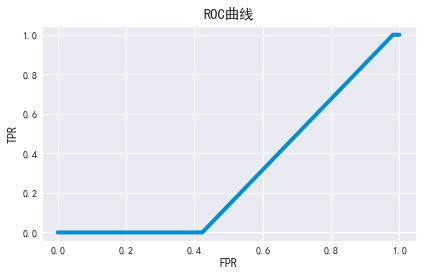

In [311]:
fpr3, tpr3, thersholds3 = metrics.roc_curve(y_test.astype('int'),svm_y,pos_label=2)
plt.plot(fpr3, tpr3) #绘制ROC曲线图
plt.xlabel("FPR") 
plt.ylabel("TPR")
plt.title("ROC曲线")
plt.show()   

### 交叉验证下的SVM建模的效果

In [269]:
scores3=cross_val_score(lsvc,data_tr,label_tr,cv=3) 
scores3.mean()

nan

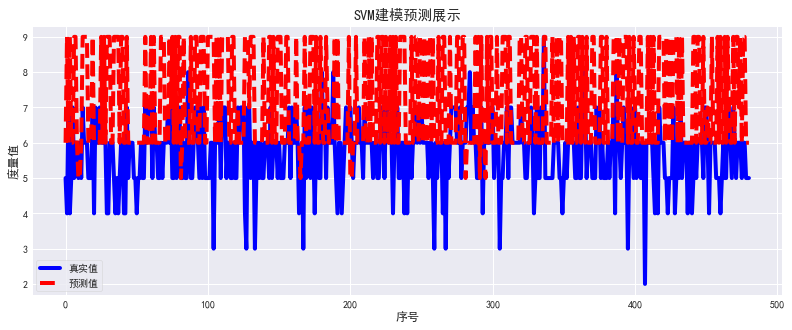

In [273]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test.astype('int'))),y_test.astype('int'),"b",label="真实值")
plt.plot(range(len(svm_y)),svm_y,"r--",label="预测值")
plt.title("SVM建模预测展示")
plt.xlabel("序号")
plt.ylabel("度量值")
plt.legend() 
plt.show() 

## adaboost回归

In [286]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [292]:
# 训练模型
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# 预测
y_1 = regr_1.predict(X_test.astype('int'))
y_2 = regr_2.predict(X_test.astype('int'))

In [293]:
regr_1.score(X_test, y_test)

0.1813107281179095

In [294]:
regr_2.score(X_test, y_test)

-0.031179639316244456

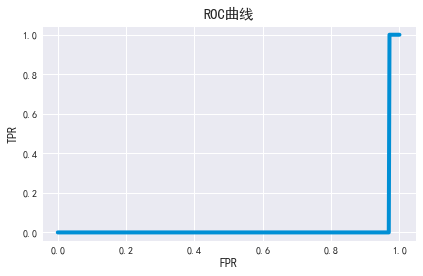

In [312]:
fpr4, tpr4, thersholds4 = metrics.roc_curve(y_test.astype('int'),y_2,pos_label=2)
plt.plot(fpr4, tpr4) #绘制ROC曲线图
plt.xlabel("FPR") 
plt.ylabel("TPR")
plt.title("ROC曲线")
plt.show()   

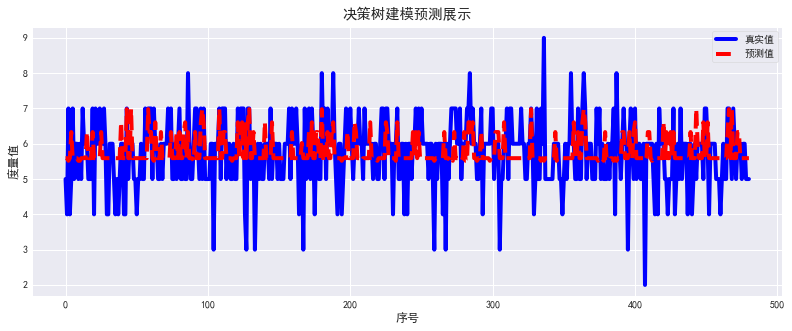

In [306]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test.astype('int'))),y_test.astype('int'),"b",label="真实值")
plt.plot(range(len(y_1)),y_1,"r--",label="预测值")
plt.title("决策树建模预测展示")
plt.xlabel("序号")
plt.ylabel("度量值")
plt.legend() 
plt.show() 

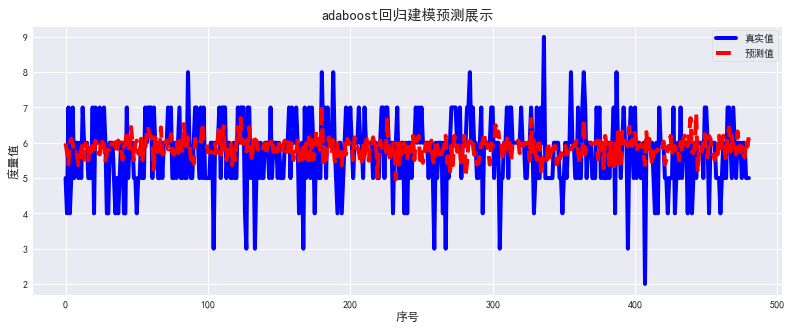

In [307]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test.astype('int'))),y_test.astype('int'),"b",label="真实值")
plt.plot(range(len(y_2)),y_2,"r--",label="预测值")
plt.title("adaboost回归建模预测展示")
plt.xlabel("序号")
plt.ylabel("度量值")
plt.legend() 
plt.show() 

In [318]:
from sklearn.ensemble import AdaBoostRegressor
model4 = AdaBoostRegressor(n_estimators=3)
model4.fit(X_train, y_train)
pred_y4 = model4.predict(X_test)

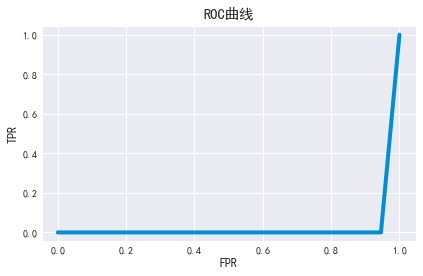

In [319]:
fpr4, tpr4, thersholds4 = metrics.roc_curve(y_test.astype('int'),pred_y4,pos_label=2)
plt.plot(fpr4, tpr4) #绘制ROC曲线图
plt.xlabel("FPR") 
plt.ylabel("TPR")
plt.title("ROC曲线")
plt.show()  

In [320]:
roc_auc4= auc(fpr4, tpr4) 
roc_auc4  

0.027083333333333348

## XGBoost

In [317]:
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier 
from sklearn.metrics import auc

In [313]:
model5 = XGBClassifier(learning_rate=0.01)
model5.fit(X_train, y_train)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [314]:
y_pred5 = model5.predict(X_test)
y_pred5

array([6.4       , 5.7       , 6.6       , 6.8       , 6.        ,
       6.9       , 4.9       , 7.4       , 5.3       , 5.4       ,
       6.09217156, 4.9       , 6.        , 5.8       , 6.6       ,
       6.1       , 6.1       , 5.8       , 5.9       , 7.5       ,
       6.8       , 7.6       , 5.4       , 5.9       , 6.8       ,
       6.5       , 6.9       , 6.9       , 6.7       , 6.        ,
       8.        , 5.8       , 6.2       , 6.5       , 5.5       ,
       6.6       , 6.3       , 5.7       , 5.4       , 6.1       ,
       3.        , 5.4       , 5.7       , 7.4       , 5.7       ,
       6.        , 7.3       , 6.2       , 6.6       , 3.        ,
       4.9       , 5.9       , 5.6       , 6.7       , 5.4       ,
       5.3       , 6.        , 6.2       , 7.4       , 7.6       ,
       7.6       , 5.8       , 5.8       , 7.3       , 6.3       ,
       6.9       , 6.        , 5.5       , 6.        , 5.3       ,
       5.4       , 6.5       , 7.1       , 6.7       , 7.2    

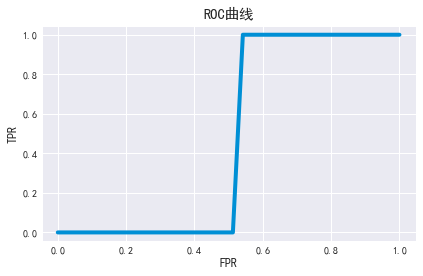

In [315]:
fpr5, tpr5, thersholds5 = metrics.roc_curve(y_test.astype('int'),y_pred5,pos_label=2)
plt.plot(fpr5, tpr5) #绘制ROC曲线图
plt.xlabel("FPR") 
plt.ylabel("TPR")
plt.title("ROC曲线")
plt.show()   

### 交叉验证下的XGBoost建模的效果

In [326]:
scores5=cross_val_score(model5,data_tr.astype('int'),label_tr.astype('int'),cv=3) 
scores5.mean()

0.4368103268790339

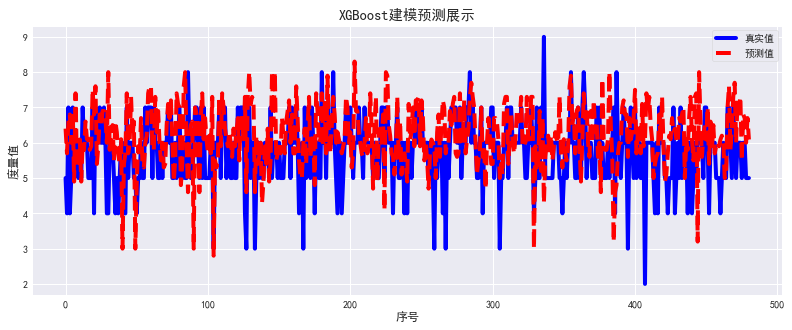

In [328]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test.astype('int'))),y_test.astype('int'),"b",label="真实值")
plt.plot(range(len(y_pred5)),y_pred5,"r--",label="预测值")
plt.title("XGBoost建模预测展示")
plt.xlabel("序号")
plt.ylabel("度量值")
plt.legend() 
plt.show() 

## 随机森林

In [321]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=300, max_depth=16, max_features=0.2, n_jobs=-1, random_state=42)
forest_reg.fit(X_train, y_train)  

RandomForestRegressor(max_depth=16, max_features=0.2, n_estimators=300,
                      n_jobs=-1, random_state=42)

In [323]:
y_pred6 = forest_reg.predict(X_test)
y_pred6

array([6.19685976, 5.82398842, 6.15139791, 5.96044647, 6.29114468,
       6.19300547, 5.65517716, 7.08871581, 6.10058999, 5.83962843,
       5.89073215, 5.60061873, 6.20768777, 6.28711153, 6.03676573,
       6.47662811, 5.7566299 , 5.7540815 , 5.66901362, 7.15054233,
       5.67700229, 6.98738085, 6.15633765, 6.03249583, 6.37784867,
       6.51419654, 6.4585841 , 6.43288245, 6.48040778, 5.68432846,
       5.95483119, 6.18986837, 6.38588794, 5.97578496, 6.0683752 ,
       6.25492167, 5.40524084, 6.01051556, 5.6945311 , 6.64489904,
       5.21067973, 5.37470053, 4.81782723, 7.19102291, 5.83683157,
       6.2227832 , 6.90582444, 6.21803052, 5.8835317 , 5.50749847,
       5.44075303, 6.19259909, 5.7770166 , 6.36644436, 4.9471921 ,
       5.7730676 , 6.32724642, 6.37378053, 7.12692521, 6.69870432,
       6.75106499, 6.13452731, 5.62119073, 6.77445879, 6.3159196 ,
       6.41260609, 6.07011214, 6.31726917, 6.12799143, 5.27805004,
       6.33847158, 6.68686767, 6.60402369, 6.54312753, 7.18276

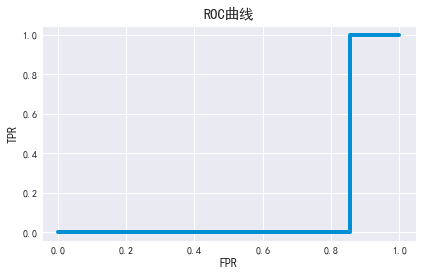

In [324]:
fpr6, tpr6, thersholds6 = metrics.roc_curve(y_test.astype('int'),y_pred6,pos_label=2)
plt.plot(fpr6, tpr6) #绘制ROC曲线图
plt.xlabel("FPR") 
plt.ylabel("TPR")
plt.title("ROC曲线")
plt.show()   

### 交叉验证下的随机森林建模的效果

In [327]:
scores6=cross_val_score(forest_reg,data_tr.astype('int'),label_tr.astype('int'),cv=3) 
scores6.mean()

0.08186053211673723

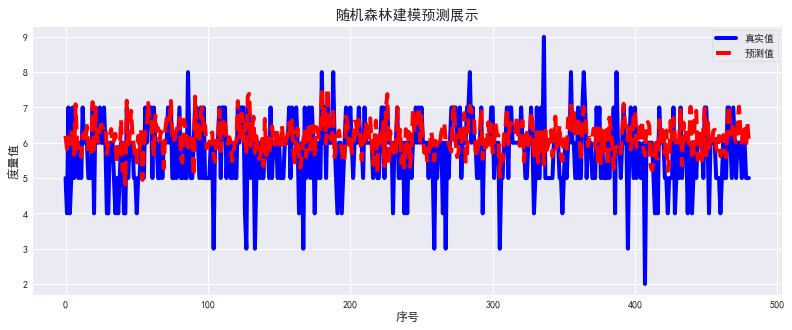

In [329]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test.astype('int'))),y_test.astype('int'),"b",label="真实值")
plt.plot(range(len(y_pred6)),y_pred6,"r--",label="预测值")
plt.title("随机森林建模预测展示")
plt.xlabel("序号")
plt.ylabel("度量值")
plt.legend() 
plt.show() 

# 模型评估

通过交叉验证精度计算，我们选择XGboost做预测

# 1000预测数据导入及处理

In [331]:
pre = pd.read_csv('F:/大三（上）/机器学习/机器学习期末报告/机器学习期末报告/电影数据分析/data/tmdb_1000_predict.csv',encoding='utf-8')
pre.head(2) 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://thewomen.warnerbros.com/index.html,13972,"[{""id"": 9749, ""name"": ""beauty salon""}, {""id"": ...",en,The Women,"The story centers on a group of gossipy, high-...",8.832100,"[{""name"": ""New Line Cinema"", ""id"": 12}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008/9/12,50007546,114,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Women,NaN,NaN
1,15000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,5038,"[{""id"": 107, ""name"": ""barcelona spain""}, {""id""...",en,Vicky Cristina Barcelona,Two girlfriends on a summer holiday in Spain b...,32.758254,"[{""name"": ""The Weinstein Company"", ""id"": 308},...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008/8/15,96408652,96,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,Life is the ultimate work of art,Vicky Cristina Barcelona,NaN,NaN


In [332]:
#json数据解析
json_cols = ['genres','keywords', 'spoken_languages', 'production_companies', 'production_countries']
for i in json_cols:
    pre[i] = pre[i].apply(json.loads)
def get_names(x):
    return ','.join([i['name'] for i in x])
pre['genres'] = pre['genres'].apply(get_names)
pre['keywords'] = pre['keywords'].apply(get_names)          
pre['spoken_languages'] = pre['spoken_languages'].apply(get_names)
pre['production_countries'] = pre['production_countries'].apply(get_names) 
pre['production_companies'] = pre['production_companies'].apply(get_names)

In [333]:
#deleted columns 
deleted_columns = ['vote_average','vote_count','homepage', 'tagline', 'overview','status']
#drop it from our pre
pre.drop(deleted_columns,axis = 1 ,inplace = True) 

In [334]:
pre.isnull().sum()  

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 0
spoken_languages        0
title                   0
dtype: int64

In [335]:
nanX2=pre['release_date'].isnull()
pre.loc[nanX2,:] 

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title
989,0,,380097,,en,America Is Still the Place,0.0,,,NaN,0,0,,America Is Still the Place


In [336]:
pre.loc[989,'release_date']='2014/6/1'
pre.loc[nanX2,:]  

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title
989,0,,380097,,en,America Is Still the Place,0.0,,,2014/6/1,0,0,,America Is Still the Place


In [337]:
# 异常值处理
# 对预算、票房、受欢迎程度、评分、评分次数中为0的数值用平均值替代
pre['budget'].replace(0, pre['budget'].mean(), inplace=True)
pre['revenue'].replace(0, pre['revenue'].mean(), inplace=True)
pre['popularity'].replace(0, pre['popularity'].mean(), inplace=True)
pre.describe()  

,budget,id,popularity,revenue,runtime
count,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,5.548203e+06,63166.587000,10.902972,2.369896e+07,102.484000
std,4.114293e+06,92898.556847,14.507062,4.261913e+07,21.892442
min,3.000000e+00,5.000000,0.000372,5.000000e+00,0.000000
25%,4.000000e+06,10337.000000,2.294844,1.173800e+07,91.000000
50%,4.159073e+06,19729.500000,6.070801,1.618781e+07,99.000000
75%,6.000000e+06,67985.250000,13.486736,1.618781e+07,110.000000
max,4.060000e+07,447027.000000,192.528841,7.929106e+08,240.000000


In [338]:
# 将release_date的数据类型转化成日期类型
pre.loc[:,'release_date']=pd.to_datetime(pre.loc[:,'release_date'],format='%Y-%m-%d',errors='coerce')
pre.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                1000 non-null   float64       
 1   genres                1000 non-null   object        
 2   id                    1000 non-null   int64         
 3   keywords              1000 non-null   object        
 4   original_language     1000 non-null   object        
 5   original_title        1000 non-null   object        
 6   popularity            1000 non-null   float64       
 7   production_companies  1000 non-null   object        
 8   production_countries  1000 non-null   object        
 9   release_date          1000 non-null   datetime64[ns]
 10  revenue               1000 non-null   float64       
 11  runtime               1000 non-null   int64         
 12  spoken_languages      1000 non-null   object        
 13  title              

In [339]:
pre['release_year'] = pd.DatetimeIndex(pre['release_date']).year
pre['release_month'] = pd.DatetimeIndex(pre['release_date']).month
pre['release_day'] = pd.DatetimeIndex(pre['release_date']).day
pre['release_dow'] = pd.DatetimeIndex(pre['release_date']).dayofweek
pre = pre.drop('release_date', axis=1) 

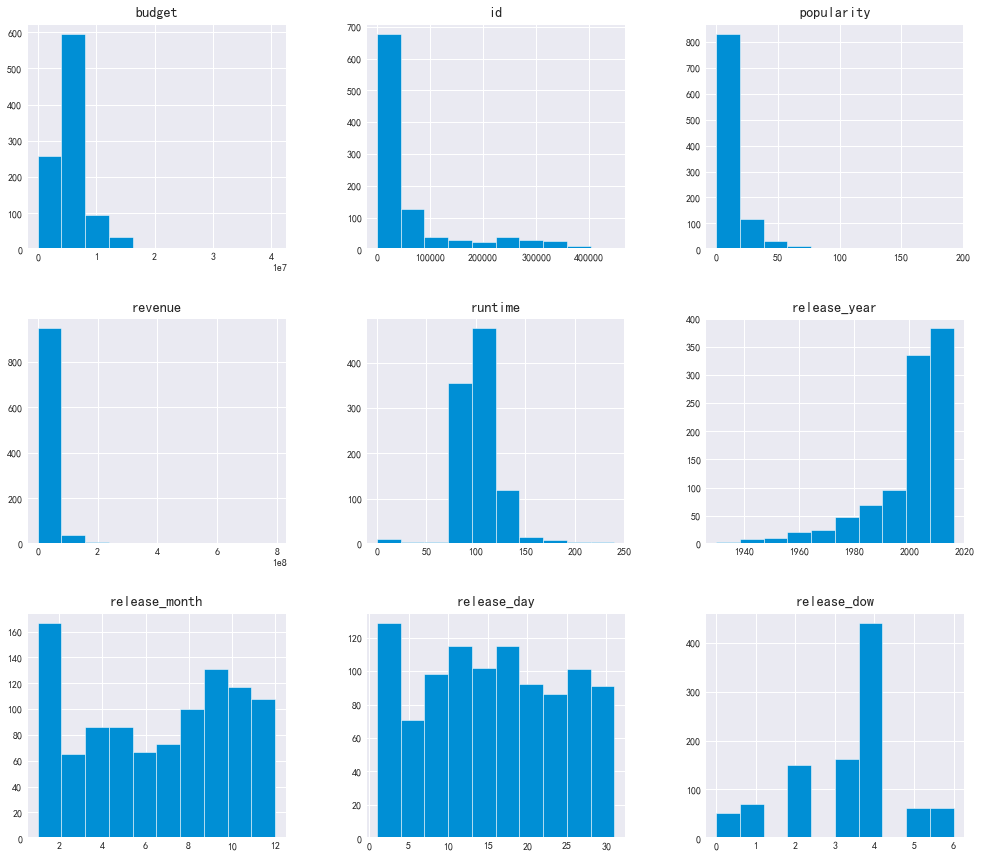

In [340]:
pre.hist(figsize=(15, 15))
plt.show() 

In [343]:
tra= pre[['budget','genres','keywords','original_language','original_title',
               'popularity','production_companies','production_countries', 
               'revenue', 'runtime','release_year','spoken_languages','title',
               'release_month','release_day','release_dow']]
tra.head(2)   

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,release_year,spoken_languages,title,release_month,release_day,release_dow
0,16000000.0,"Comedy,Drama,Romance","beauty salon,divorce,woman director",en,The Women,8.832100,New Line Cinema,United States of America,50007546.0,114,2008,English,The Women,9,12,4
1,15000000.0,"Drama,Romance","barcelona spain,menage a trois,author",en,Vicky Cristina Barcelona,32.758254,"The Weinstein Company,Gravier Productions,Ante...","United States of America,Spain",96408652.0,96,2008,"Español,English",Vicky Cristina Barcelona,8,15,4


In [344]:
train1 = tra['genres'].str.split(',',0,expand=True)
train2 = tra['keywords'].str.split(',',0,expand=True)
train3 = tra['production_companies'].str.split(',',0,expand=True)
train4 = tra['production_countries'].str.split(',',0,expand=True)
train5 = tra['spoken_languages'].str.split(',',0,expand=True)
tra['genres']=train1[0]
tra['keywords']=train2[0]
tra['production_companies']=train3[0]
tra['production_countries']=train4[0]
tra['spoken_languages']=train5[0]
tra.head() 

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,release_year,spoken_languages,title,release_month,release_day,release_dow
0,1.600000e+07,Comedy,beauty salon,en,The Women,8.832100,New Line Cinema,United States of America,5.000755e+07,114,2008,English,The Women,9,12,4
1,1.500000e+07,Drama,barcelona spain,en,Vicky Cristina Barcelona,32.758254,The Weinstein Company,United States of America,9.640865e+07,96,2008,Español,Vicky Cristina Barcelona,8,15,4
2,2.500000e+07,Action,tv movie,sv,Arn: Tempelriddaren,6.091033,Danmarks Radio (DR),Sweden,1.618781e+07,139,2007,العربية,Arn: The Knight Templar,12,17,0
3,1.600000e+07,Comedy,soulmates,en,Boys and Girls,9.119797,Punch 21 Productions,United States of America,2.062737e+07,94,2000,English,Boys and Girls,6,16,4
4,4.159073e+06,Drama,poison,en,White Oleander,9.423866,Pandora Filmproduktion,Germany,1.618781e+07,109,2002,English,White Oleander,10,11,4


In [345]:
X3 = tra[['genres','keywords','production_companies','production_countries',
      'spoken_languages']] 
X33=pd.get_dummies(X3, drop_first=True)
X33.head()   

,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western,keywords_1970s,keywords_adaptation,keywords_adolescence,keywords_adoptive mother,keywords_adultery,keywords_african american,keywords_aftercreditsstinger,keywords_alan smithee,keywords_alcatraz,keywords_alcohol,keywords_alcoholism,keywords_alien,keywords_alternate dimension,keywords_american football,keywords_amnesia,keywords_android,keywords_angel,keywords_anonymity,keywords_anti-christ,keywords_arbitrary law,keywords_armageddon,keywords_arranged marriage,keywords_artist,keywords_asia,keywords_assassin,keywords_asteroid,keywords_australia,keywords_auto,keywords_ax,keywords_bachelor,keywords_bangkok,keywords_bar,keywords_bar mitvah,keywords_barcelona spain,keywords_baseball,keywords_based on novel,keywords_based on video game,keywords_basement,keywords_bathroom,keywords_beach,keywords_beauty salon,keywords_becoming an adult,keywords_beethoven,keywords_behind the scenes,keywords_berlin,keywords_best selling author,keywords_bet,keywords_biography,keywords_birthday,keywords_black people,keywords_blacksmith,keywords_blood splatter,keywords_boarding school,keywords_boat,keywords_bomb,keywords_bomb squad,keywords_brain tumor,keywords_brazil,keywords_brazilian,keywords_bridesmaid,keywords_british,keywords_brother brother relationship,keywords_brother sister relationship,keywords_budapest,keywords_buddhism,keywords_bureaucracy,keywords_bus,keywords_butterfly,keywords_cabin,keywords_calamity,keywords_california,keywords_canada,keywords_cancer,keywords_capitalism,keywords_car race,keywords_casino,keywords_cat,keywords_cheerleader,keywords_chicago,keywords_child abuse,keywords_children's book,keywords_chocolate,keywords_christian,keywords_christian film,keywords_christianity,keywords_christmas tree,keywords_cia,keywords_cincinnati,keywords_circus,keywords_civil war,keywords_climate change,keywords_clown,keywords_cold war,keywords_college,keywords_coma,keywords_coming of age,keywords_coming out,keywords_commercial,keywords_competition,keywords_composer,keywords_compulsive gambling,keywords_con man,keywords_concert,keywords_confession,keywords_consignment,keywords_corruption,keywords_crime fighter,keywords_crucifixion,keywords_cult,keywords_daily life,keywords_dance,keywords_dancer,keywords_dancing,keywords_dark comedy,keywords_date,keywords_dc comics,keywords_deafness,keywords_death of a friend,keywords_death of lover,keywords_decision,keywords_deer,keywords_depression,keywords_desperation,keywords_detective,keywords_dialogue,keywords_diary,keywords_dictator,keywords_diet,keywords_diner,keywords_disgust,keywords_diving,keywords_dolphin,keywords_dominatrix,keywords_double life,keywords_dragon,keywords_drama,keywords_drowning,keywords_drug abuse,keywords_drug addiction,keywords_drug dealer,keywords_dude,keywords_duringcreditsstinger,keywords_dystopia,keywords_eating,keywords_ecstasy,keywords_egypt,keywords_energy policy,keywords_england,keywords_eroticism,keywords_evacuation,keywords_evangelist,keywords_expensive restaurant,keywords_experiment,keywords_exploding building,keywords_exploitation,keywords_factory,keywords_false identity,keywords_family secrets,keywords_famous score,keywords_fan,keywords_fanatic,keywords_farewell,keywords_father son relationship,keywords_female nudity,keywords_fictional place,keywords_film making,keywords_finances,keywords_fire,keywords_fish,keywords_flooding,keywords_flying car,keywords_folk music,keywords_fortune teller,keywords_found footage,keywords_free love,keywords_friends,keywords_friendship,keywords_gambling,keywords_garage,keywords_gay,keywords_gay interest,keywords_germany,keywords_giant insect,keywords_goa,keywords_god,keywords_golf,keywords_grandfather grandson relationship,keywords_grifter,keywords_group therapy,k

In [346]:
X33=X33[['genres_Drama','genres_Comedy','genres_Thriller',
         'keywords_independent film','keywords_woman director','keywords_duringcreditsstinger',
         'production_companies_Universal Pictures','production_companies_Paramount Pictures',
         'production_countries_United States of America','spoken_languages_English']]
X33.head(2)  

,genres_Drama,genres_Comedy,genres_Thriller,keywords_independent film,keywords_woman director,keywords_duringcreditsstinger,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_countries_United States of America,spoken_languages_English
0,0,1,0,0,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,1,0


In [347]:
X4 = tra[['budget','popularity','revenue','runtime']] 
scaler=StandardScaler()
X44=scaler.fit_transform(X4)
X44=pd.DataFrame(X44,columns=['budget','popularity','revenue','runtime'])
X44.head(2)  

,budget,popularity,revenue,runtime
0,2.541634,-0.142821,0.617604,0.526289
1,2.298457,1.507281,1.706888,-0.296323


In [348]:
t1 = tra[['release_month','release_day','release_dow']] 

In [349]:
df3=pd.concat([X11,X22,t1],axis=1)
df3.head(2)    

,genres_Drama,genres_Comedy,genres_Thriller,keywords_independent film,keywords_woman director,keywords_duringcreditsstinger,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_countries_United States of America,spoken_languages_English,budget,popularity,revenue,runtime,release_month,release_day,release_dow
0,1,0,0,0,0,0,0,0,1,1,-0.921611,-0.574136,-0.635767,3.986679,9.0,12.0,4.0
1,1,0,0,0,0,0,0,0,1,0,-0.925329,-0.651048,-0.547779,1.952008,8.0,15.0,4.0


# 1000数据模型预测并输出

In [350]:
predicted_vote_average = model5.predict(df3)
overall_data = df3.copy()
overall_data['vote_average'] = predicted_vote_average.copy() 

In [351]:
overall_data.head(2) 

,genres_Drama,genres_Comedy,genres_Thriller,keywords_independent film,keywords_woman director,keywords_duringcreditsstinger,production_companies_Universal Pictures,production_companies_Paramount Pictures,production_countries_United States of America,spoken_languages_English,budget,popularity,revenue,runtime,release_month,release_day,release_dow,vote_average
0,1,0,0,0,0,0,0,0,1,1,-0.921611,-0.574136,-0.635767,3.986679,9.0,12.0,4.0,7.4
1,1,0,0,0,0,0,0,0,1,0,-0.925329,-0.651048,-0.547779,1.952008,8.0,15.0,4.0,7.0


In [352]:
a=overall_data[['vote_average']]
b = pd.read_csv('F:/大三（上）/机器学习/机器学习期末报告/机器学习期末报告/电影数据分析/data/tmdb_1000_predict.csv',encoding='utf-8')
c=pd.concat([a,b],axis=1)
c.head()  

,vote_average,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,7.4,16000000.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://thewomen.warnerbros.com/index.html,13972.0,"[{""id"": 9749, ""name"": ""beauty salon""}, {""id"": ...",en,The Women,"The story centers on a group of gossipy, high-...",8.832100,"[{""name"": ""New Line Cinema"", ""id"": 12}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008/9/12,50007546.0,114.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Women,NaN,NaN
1,7.0,15000000.0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,5038.0,"[{""id"": 107, ""name"": ""barcelona spain""}, {""id""...",en,Vicky Cristina Barcelona,Two girlfriends on a summer holiday in Spain b...,32.758254,"[{""name"": ""The Weinstein Company"", ""id"": 308},...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008/8/15,96408652.0,96.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,Life is the ultimate work of art,Vicky Cristina Barcelona,NaN,NaN
2,8.0,25000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,13491.0,"[{""id"": 156321, ""name"": ""tv movie""}]",sv,Arn: Tempelriddaren,"Arn, the son of a high-ranking Swedish noblema...",6.091033,"[{""name"": ""Danmarks Radio (DR)"", ""id"": 119}, {...","[{""iso_3166_1"": ""SE"", ""name"": ""Sweden""}]",2007/12/17,0.0,139.0,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",Released,A Knight in the Holy Land. A Woman in the Froz...,Arn: The Knight Templar,NaN,NaN
3,6.8,16000000.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,10571.0,"[{""id"": 815, ""name"": ""soulmates""}, {""id"": 1605...",en,Boys and Girls,Ryan and Jennifer are opposites who definitely...,9.119797,"[{""name"": ""Punch 21 Productions"", ""id"": 13158}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2000/6/16,20627372.0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Warning: Sex Changes Everything,Boys and Girls,NaN,NaN
4,7.4,0.0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10994.0,"[{""id"": 351, ""name"": ""poison""}, {""id"": 378, ""n...",en,White Oleander,A teenager journeys through a series of foster...,9.423866,"[{""name"": ""Pandora Filmproduktion"", ""id"": 254}...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2002/10/11,0.0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,White Oleander,NaN,NaN


In [353]:
# 保存 csv 
c.to_csv(path_or_buf='F:/大三（上）/机器学习/机器学习期末报告/机器学习期末报告/电影数据分析/data/tmdb_1000_predicted.csv',index=False)